# Setup & Load Data

In [1]:
from __future__ import unicode_literals
import os
import sys
# sys.path.append('../')
import datetime
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as md
import matplotlib.dates as mdates
import random
import seaborn as sns
%matplotlib inline
sys.path.append('../')
from matplotlib import font_manager, rc
from tools.utils import *
from pytz import timezone
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

# font setup
font_dirs = ['../']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Times New Roman'

data_path = '../enertalk-dataset/'
fig_width = 8.9
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches

meta = pd.read_csv('meta.csv')

meta['app_name'] = meta['app'].str[3:]
meta = meta.loc[meta['app_name']!='total']
meta['pretty_app_name'] = meta['app_name'].apply(get_pretty_name)
on_ratio = {}
app_lst = ['TV', 'kimchi-fridge', 'rice-cooker', 'microwave', 'water-purifier',
           'washing-machine', 'fridge']

for app_name in app_lst:
    app_meta = meta.loc[meta['app_name']==app_name]
    pretty_name = get_pretty_name(app_name)
    on_ratio[pretty_name] = app_meta['on_ratio']
    

# Visualize Figur 10. Box plot of daily on-ratio over the 22 houses.

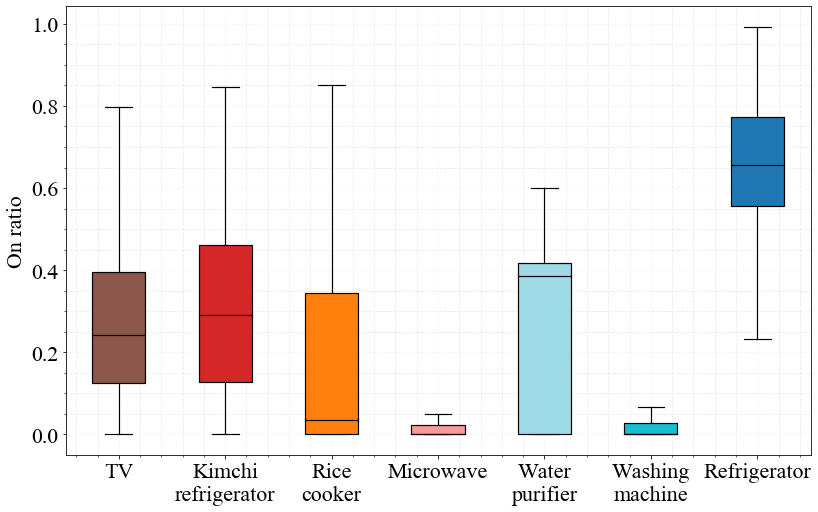

In [2]:
labels, data = on_ratio.keys(), on_ratio.values()
labels = [label.replace(' ', '\n') for label in labels]
overall_fontsize = 22
overall_linewidth = 1.2

fig = plt.figure(figsize=(fig_width*1.5, fig_height*1.5))
box = plt.boxplot(data, showfliers=False,patch_artist=True)
for patch, app_name in zip(box['boxes'], app_lst):
    patch.set_facecolor(get_app_color(app_name))
    patch.set_linewidth(overall_linewidth)
    
for median in box['medians']:
    median.set_color('black')
    median.set_linewidth(overall_linewidth)
    
for key in ['whiskers', 'caps', 'boxes']:
    element = box[key]
    for atom in element:
        atom.set_linewidth(overall_linewidth)
    
plt.ylabel('On ratio',  fontsize = overall_fontsize)
plt.xticks(range(1, len(labels) + 1), labels, fontsize = overall_fontsize)
plt.yticks(fontsize = overall_fontsize)
ax = plt.gca()
ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
plt.show()
fig.savefig('../plots/on_ratio_distribution.pdf', bbox_inches='tight', format='pdf', dpi=1000)